### PyTorch Turorial

Changed from PyTorch Crash Course by AssemblyAI Team

See video - https://www.youtube.com/watch?v=OIenNRt2bjg

PyTorch is an open-source Machine Learning / Deep Learning library developed by Facebook's AI Research lab (FAIR).

It has tooling for defining and running Neural Networks - matrix/tensor operations

In [37]:
import torch

In [38]:
x = torch.empty(1) # scalar
print("empty(1):\n", x)

empty(1):
 tensor([0.])


In [39]:
x = torch.empty(3) # vector
print("empty(3):\n",x)

empty(3):
 tensor([0., 0., 0.])


In [40]:
x = torch.empty(2, 3) # matrix
print("empty(2,3):\n",x)

empty(2,3):
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [41]:
x = torch.empty(2, 2, 3) # tensor, 3 dimensions
#x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print("empty(2, 2, 3):\n",x)

empty(2, 2, 3):
 tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [42]:
# torch.rand(size): random numbers [0, 1]
x = torch.rand(5, 3)
print("rand(5,3):\n", x)

rand(5,3):
 tensor([[0.1623, 0.2281, 0.3578],
        [0.8454, 0.5386, 0.9514],
        [0.6465, 0.9910, 0.3754],
        [0.8346, 0.4947, 0.4315],
        [0.1036, 0.3928, 0.5805]])


In [43]:
# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x = torch.zeros(5, 3)
print("zeros(5,3):\n", x)

zeros(5,3):
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [44]:
# check size
print("size :", x.size())  # x.size(0)
print("shape:", x.shape)  # x.shape[0]

size : torch.Size([5, 3])
shape: torch.Size([5, 3])


In [45]:
# check data type
print(x.dtype)

torch.float32


In [46]:
# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)


In [47]:
# check type
print(x.dtype)

torch.float16


In [48]:
# construct from data
x = torch.tensor([5.5, 3])
print(x,"\n",x.dtype,"\n",x.shape)

tensor([5.5000, 3.0000]) 
 torch.float32 
 torch.Size([2])


In [49]:
# requires_grad argument tells to calculate the gradients for this tensor
# later in your optimization steps - thus optimizing it
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


## Operations with Tensors

In [50]:
# Operations
x = torch.ones(2, 2)
y = torch.rand(2, 2)
print(x)
print(y)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.0853, 0.8777],
        [0.1205, 0.6140]])


In [51]:
# elementwise addition
z = x + y # torch.add(x,y)
print(z)

tensor([[1.0853, 1.8777],
        [1.1205, 1.6140]])


In [52]:
# a trailing underscore means "in-place" operation
# y.add_(x) - will modify y

In [53]:
z = x - y
z = torch.sub(x, y)
print(z)

tensor([[0.9147, 0.1223],
        [0.8795, 0.3860]])


In [54]:
# multiplication
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])

# Element-wise multiplication
element_wise_product = A * B  # torch.mul(A, B) 

# Matrix multiplication
matrix_product = torch.matmul(A, B)  # or A @ B

print("Element-wise multiplication:\n", element_wise_product)
print("Matrix multiplication:\n", matrix_product)

Element-wise multiplication:
 tensor([[ 5, 12],
        [21, 32]])
Matrix multiplication:
 tensor([[19, 22],
        [43, 50]])


In [55]:
# Element-wise division
element_wise_division = A / B   # or torch.div(A,B)

print("Element-wise division:\n", element_wise_division)

Element-wise division:
 tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


In [56]:
# Slicing
x = torch.rand(5,3)
print(x)

tensor([[0.5937, 0.4652, 0.9615],
        [0.5062, 0.2631, 0.7838],
        [0.2176, 0.6509, 0.1988],
        [0.9398, 0.3456, 0.6082],
        [0.0623, 0.2582, 0.3734]])


In [57]:
print("x[:, 0]", x[:, 0]) # all rows, column 0

x[:, 0] tensor([0.5937, 0.5062, 0.2176, 0.9398, 0.0623])


In [58]:
print("x[1, :]", x[1, :]) # row 1, all columns

x[1, :] tensor([0.5062, 0.2631, 0.7838])


In [59]:
print("x[1, 1]", x[1,1]) # element at 1, 1

x[1, 1] tensor(0.2631)


In [60]:
# Get the actual value if only 1 element in your tensor
print("x[1,1].item()", x[1,1].item())

x[1,1].item() 0.2631218433380127


In [61]:
# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # if -1 it pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## NumPy to Torch - and back

In [62]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [63]:
# torch to numpy with .numpy()
b = a.numpy()
print(b)
print(type(b))

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [64]:
# Careful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, 
# so changing one will also change the other
a.add_(1) # modify a by adding 1 to all elements
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [65]:
# numpy to torch with .from_numpy(x), or torch.tensor() to copy it
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.tensor(a)
print(a)
print(b)
print(c)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [66]:
# again be careful when modifying
a += 1
print(a)   # 2
print(b)   # 2
print(c)   # 1

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## GPU Support

By default all tensors are created on the CPU. 
<br>But we can also move them to the GPU (if available ), 
<br>or create them directly on the GPU.

In [67]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.rand(2,2).to(device)  # move tensors to GPU device
# x = x.to("cpu")
# x = x.to("cuda")

x = torch.rand(2,2, device=device)  # or directy create them on GPU

print(x)

tensor([[0.2470, 0.1355],
        [0.9789, 0.9694]])


## Autograd package 

Provides automatic differentiation for all operations on Tensors
<br>(Grad - from "gradient")
<br>*torch.autograd* is an engine for computing the vector-Jacobian product. 
<br>It computes partial derivates while applying the chain rule.

Set `requires_grad = True`:

In [68]:
import torch

# requires_grad = True -> tracks all operations on the tensor.
x = torch.randn(3, requires_grad=True)
y = x + 2

In [69]:
# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([0.3359, 0.0302, 1.9860], requires_grad=True)
tensor([2.3359, 2.0302, 3.9860], grad_fn=<AddBackward0>)


In [70]:
# Do more operations on y
z = y * y * 3
print(z)

tensor([16.3696, 12.3652, 47.6638], grad_fn=<MulBackward0>)


In [71]:
z = z.mean()
print(z)

tensor(25.4662, grad_fn=<MeanBackward0>)


In [72]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() 
# and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor
x = torch.randn(3, requires_grad=True)
y = x + 2
z = y * y * 3
z = z.mean()

In [74]:
print("before:",x.grad)
z.backward()
print("after :", x.grad) # dz/dx

# If you try to run this cell 2nd time - you will get 
# an RuntimeError: Trying to backward through the graph a second time
# 
# !!! Careful!!! backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!! optimizer.zero_grad()

before: tensor([6.9892, 5.5806, 2.4973])


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

## You can stop a tensor from tracking history:

For example during the training loop when we want 
<br>to update our weights, or after training during evaluation. 
<br>These operations should not be part of the gradient computation. 
<br>To prevent this, we can use:

- `x.requires_grad_(False)`
- `x.detach()`
- wrap in `with torch.no_grad():`

In [ ]:
# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

In [ ]:
a.requires_grad_(True)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

In [ ]:
# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

In [ ]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    b = a ** 2
    print(b.requires_grad)

## Gradient Descent Autograd
Linear Regression example:

In [76]:
import torch

# Linear regression
# f = w * x  + b
# here : f = 2 * x

X = torch.tensor([1, 2, 3, 4,  5,  6,  7,  8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

X_test = 5.0

print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.000


In [77]:
# Training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
    y_pred = forward(X) # predict = forward pass
    l = loss(Y, y_pred)
    l.backward() # calculate gradients = backward pass

    # update weights: w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
      w -= learning_rate * w.grad
    w.grad.zero_() # zero the gradients after updating
    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')

epoch 10: w = 1.998, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
Prediction after training: f(5.0) = 10.000


## Model, Loss & Optimizer

A typical PyTorch pipeline looks like this:

1. Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
  - Forward = compute prediction and loss
  - Backward = compute gradients
  - Update weights

In [78]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x
# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4],  [5],  [6],  [7],  [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'n_samples = {n_samples}, n_features = {n_features}')

n_samples = 8, n_features = 1


In [79]:
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)
print(X_test)

tensor([5.])


In [80]:
# 1) Design Model, the model has to implement the forward pass!
# Here we could simply use a built-in model from PyTorch
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define different layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

In [81]:
input_size, output_size = n_features, n_features
model = LinearRegression(input_size, output_size)
print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = -2.249


In [82]:
# 2) Define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [83]:
# 3) Training loop
for epoch in range(n_epochs):
    y_predicted = model(X) # predict = forward pass with our model
    l = loss(Y, y_predicted)
    l.backward() # calculate gradients = backward pass
    optimizer.step() # update weights
    optimizer.zero_grad() # zero the gradients after updating
    if (epoch+1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l.item())
print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')

epoch  10 : w =  1.8343435525894165  loss =  0.1773388683795929
epoch  20 : w =  1.842151165008545  loss =  0.16349534690380096
epoch  30 : w =  1.8483418226242065  loss =  0.15092428028583527
epoch  40 : w =  1.8542888164520264  loss =  0.1393197774887085
epoch  50 : w =  1.8600027561187744  loss =  0.1286076307296753
epoch  60 : w =  1.865492582321167  loss =  0.11871896684169769
epoch  70 : w =  1.8707669973373413  loss =  0.10959067940711975
epoch  80 : w =  1.8758348226547241  loss =  0.1011643335223198
epoch  90 : w =  1.8807038068771362  loss =  0.09338576346635818
epoch  100 : w =  1.885381817817688  loss =  0.08620534092187881
Prediction after training: f(5.0) = 10.071


## First Neural Net
GPU, Datasets, DataLoader, Transforms, Neural Net, Training & Evaluation

In [84]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [85]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [86]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

In [87]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [88]:
examples = iter(test_loader)
examples

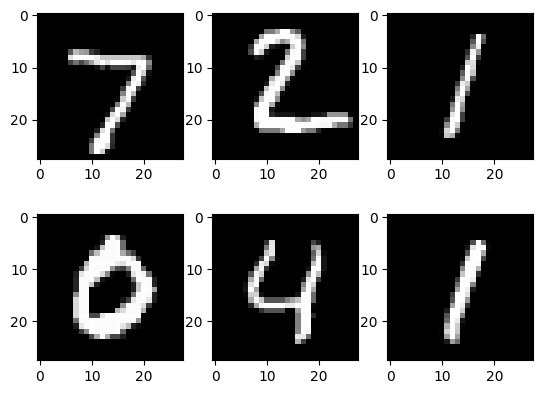

In [89]:
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [90]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [91]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [92]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.3707
Epoch [1/2], Step [200/600], Loss: 0.1868
Epoch [1/2], Step [300/600], Loss: 0.2924
Epoch [1/2], Step [400/600], Loss: 0.4198
Epoch [1/2], Step [500/600], Loss: 0.2619
Epoch [1/2], Step [600/600], Loss: 0.1427
Epoch [2/2], Step [100/600], Loss: 0.1170
Epoch [2/2], Step [200/600], Loss: 0.1445
Epoch [2/2], Step [300/600], Loss: 0.1112
Epoch [2/2], Step [400/600], Loss: 0.0377
Epoch [2/2], Step [500/600], Loss: 0.0727
Epoch [2/2], Step [600/600], Loss: 0.1050


In [94]:
# Test the model: we don't need to compute gradients
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        # max returns (output_value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test images: {100*acc} %')

Accuracy of the network on the 10000 test images: 97.18 %


## CNN

- Convolutional Layers
- MaxPooling
- Save/Load model

In [95]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [96]:
# XXXXXXXXXXXXXXXXX

In [97]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

In [98]:
# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


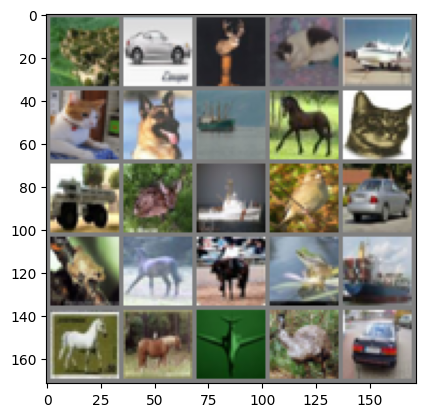

In [99]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(imgs):
    imgs = imgs / 2 + 0.5   # unnormalize
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)

In [101]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        # N, 3, 32, 32
        x = F.relu(self.conv1(x))   # -> N, 32, 30, 30
        x = self.pool(x)            # -> N, 32, 15, 15
        x = F.relu(self.conv2(x))   # -> N, 64, 13, 13
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv3(x))   # -> N, 64, 4, 4
        x = torch.flatten(x, 1)     # -> N, 1024
        x = F.relu(self.fc1(x))     # -> N, 64
        x = self.fc2(x)             # -> N, 10
        return x

In [103]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [104]:
%%time
# training takes ~5 min
n_total_steps = len(train_loader)
for epoch in range(num_epochs):

    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

[1] loss: 1.460
[2] loss: 1.069
[3] loss: 0.913
[4] loss: 0.812
[5] loss: 0.740
[6] loss: 0.680
[7] loss: 0.631
[8] loss: 0.580
[9] loss: 0.541
[10] loss: 0.505
Finished Training
CPU times: user 6min 24s, sys: 4min 27s, total: 10min 51s
Wall time: 5min 8s


In [105]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the path file itself
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the model: {acc} %')

    acc = 100.0 * n_correct2 / n_samples
    print(f'Accuracy of the loaded model: {acc} %')

Accuracy of the model: 73.0 %
Accuracy of the loaded model: 73.0 %
